# Week 13 Discussion

## Rich-Get-Rich Model Simulation

During the lecture, we talked about the Rich-Get-Richer Model. We assume each page links to a one other page when it join the network. With probability p, the page chooses an existing page j uniformly at random and links to j. With probability 1-p, the page chooses an existing page j uniformly at random and it links to the page j links to. 

This time, we are going to write an function using NetworkX to simulate this network generating procedure.

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import bisect
%matplotlib inline

In [29]:
def preferential_att(n, p):
    # This function has two parameters n and p
    # n specifies how many nodes it should have in the end
    # p is the probability of linking to an existing node randomly
    G = nx.DiGraph()
    G.add_edges_from([(0,1),(1,0)])
    # We start the network growing from a pair of nodes link to each other
    for i in range(n-2):
        if random.random() > p:
            #copying
            G.add_edges_from([(i+2,G.neighbors(random.choice(G.nodes()))[0])])
            # Complete this function
            # Hint: random.choice() allows you choose one element from a list
        else:
            #pointing
            G.add_edges_from([(i+2,random.choice(G.nodes()))])
            # Complete this function
    return G

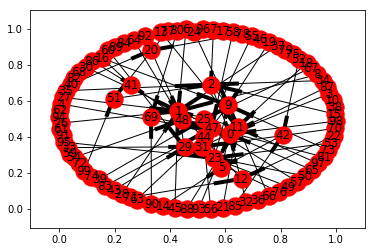

In [30]:
g1 = preferential_att(100, 0.5)
nx.draw_networkx(g1, with_labels=True)
plt.show()

Pyplot is a powerful drawing tool in python. Now, we can use it to plot out the distribution of the in-degrees. Is it close to power-law distribution?

You can play around with different parameter combinations, but remember to comment out "nx.draw_networkx" line when using a large value as number of nodes.

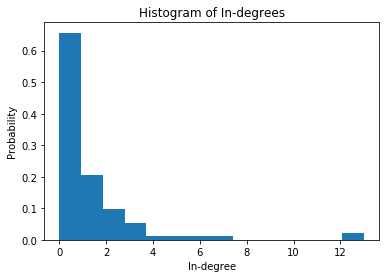

In [31]:
degree_list = list(g1.in_degree().values())

x = degree_list
num_bins = max(degree_list) - min(degree_list)+1
plt.hist(x, num_bins, normed=1)

plt.xlabel('In-degree')
plt.ylabel('Probability')
plt.title(r'Histogram of In-degrees')
plt.show()

###### Let's consider another network growing mechanism

Price's model (named after the physicist Derek J. de Solla Price) is a mathematical model for the growth of citation networks. His idea was that the way how an old vertex (existing paper) gets new edges (new citations) should be proportional to the number of existing edges (existing citations) the vertex already has, which is another type of preferential attachment[1].

Assume that each paper cites some constant number (m) of earlier papers. The probability of a new node connects to an existing node is proportional to its in-degrees. However, new nodes would have 0 probability of being cited in the future, which is obviously unrealistic. So, we need to fix this model by adding a constant number (k) to each node's degree when calculating the probability.

In this model, we need to find the degree of all existing nodes and use Cumulative distribution function (cdf) to project all nodes degrees in the range [0, 1]. Then, we can use random.random() to generate a value between [0,1] to decide which node should be chosen.

For instance: there are 3 nodes with in-degrees of [2,1,0] and the smoothing parameter is 1:
       
    The smoothed in-degrees are [3,2,1]. If we project these three nodes between [0,1], we should have a cdf list:
      
      [3/6, (3+2)/6, (3+2+1)/6], 
    
    which is [1/2, 5/6, 1].
     

In [37]:
def choose_node(g, k = 0):
    nodes = list(g.in_degree().keys())
    weights = list(g.in_degree().values())
    total = sum(weights)+len(nodes)*k
    cdf = []
    cumulative_sum = 0
    for w in weights:
        cumulative_sum += w+k
        cdf.append(cumulative_sum/total)
        # complete this function
    idx = bisect.bisect(cdf, random.random())
    return nodes[idx]


def price_model(n,k,m):
    # n: total number of nodes
    # k: smoothing parameter
    # m: out-degree for each node
    G = nx.DiGraph()
    G.add_edges_from([(0,1),(1,0)])
    for i in range(n-2):
        add_edge = []
        # randomly choose m nodes in the network based on their in degree
        while len(add_edge)< m:
            target_node = choose_node(G,k)
            if target_node not in add_edge:
                # Make sure we have m unique edges
                add_edge.append(target_node)
        
        for node in add_edge:
            G.add_edge(i+2,node)
    
    return G

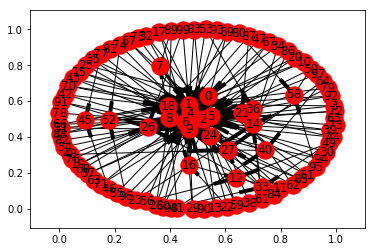

In [38]:
g2 = price_model(100, 1, 2)
nx.draw_networkx(g2, with_labels=True)
plt.show()

Let's see the in-degree distribution

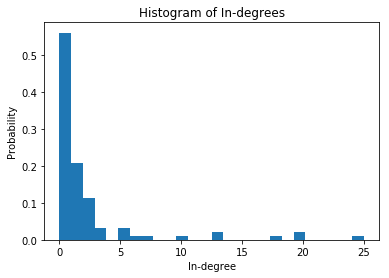

In [39]:
degree_list = list(g2.in_degree().values())

x = degree_list
num_bins = max(degree_list) - min(degree_list)+1
plt.hist(x, num_bins, normed=1)

plt.xlabel('In-degree')
plt.ylabel('Probability')
plt.title(r'Histogram of In-degrees')
plt.show()

[1]: Price's model. (2017, September 29). In Wikipedia, The Free Encyclopedia. Retrieved 04:44, November 26, 2017, from https://en.wikipedia.org/w/index.php?title=Price%27s_model&oldid=802957234